## Order to Delivery (OTD) Time Forecasting

- Ease of e-commerce over the last decade, along with the recent COVID-19 pandemic, has seen a marked shift in consumer behavior and expectations when it comes to purchase - and more importantly, the delivery of goods. This has caused a paradigm shift in functioning of the supply chain. Along with delivery speed, consumers feel that the **transparency** around delivery time and shipment status are an equally important aspect of the fulfilment process. This has direct implications in customer churn/retention. More than half of consumers are less likely to shop with a retailer if the item is not delivered within 2 days of date promised. [(source)](https://www.hollingsworthllc.com/how-late-deliveries-impact-customer-retention/)

### Order to Delivery Time Forecasting as a Supply Chain Optimization Usecase:

**OTD forecasting is a key aspect of supply chain optimization as it helps to ensure that customers receive their products in a timely manner, it enables companies to make informed decisions about inventory, logistics and production which in turn helps to improve the overall efficiency of the supply chain.**

## AI Project Cycle  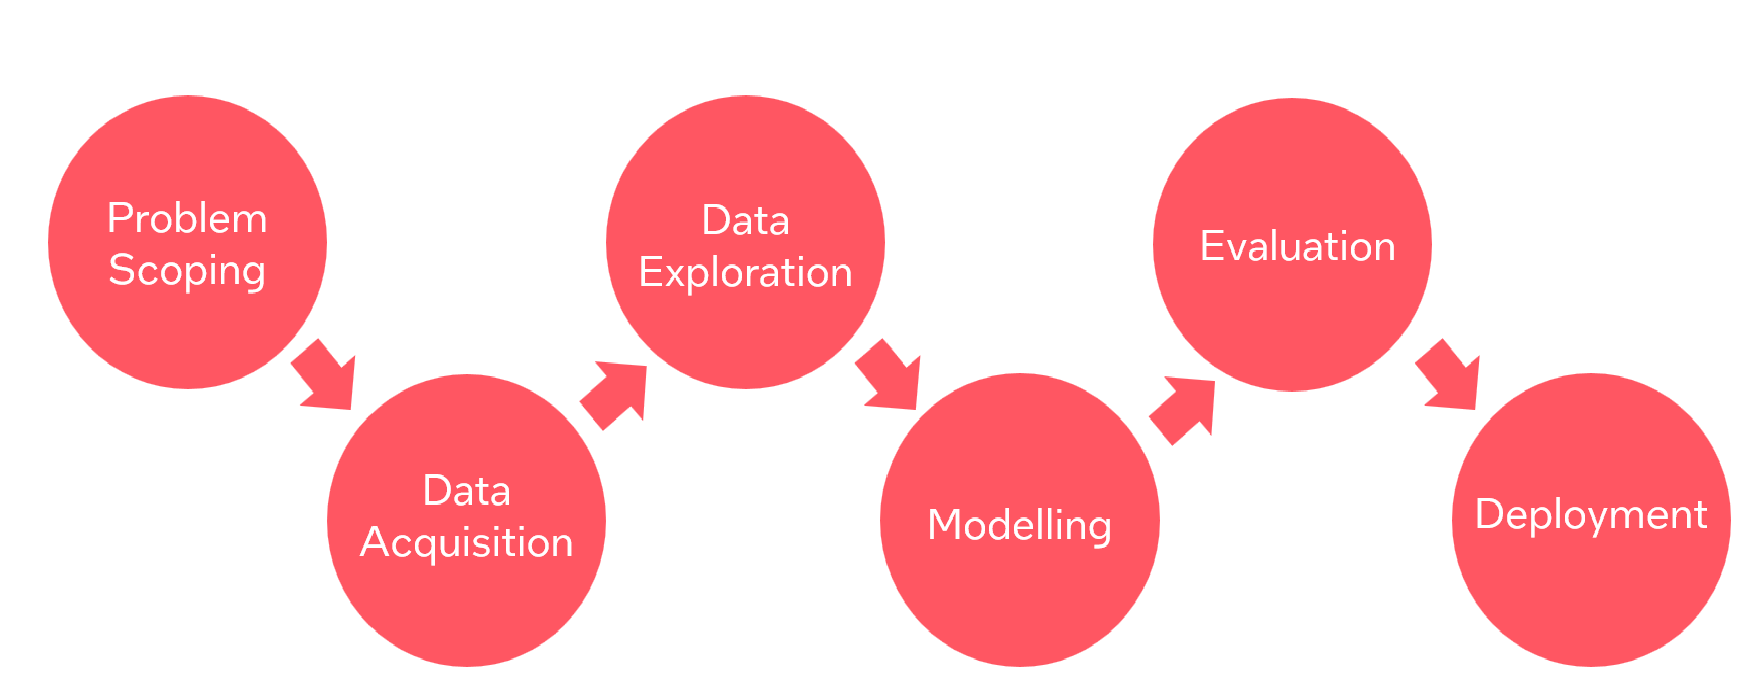

## Context: Understanding the Problem Statement --------Problem Scoping (AI Project Cycle - Step 1)

**An ML based predictive solution for providing delivery time forecasting**

-  An ML based predictive solution for providing delivery time forecasting can provide great insights to e-commerce platforms. From a customer-facing point of view these insights would help e-commerce platforms to give more accurate delivery forecasts to customers and decrease customer churn. In addition, the ML based predictive solution will also allow e-commerce platforms to take pre-emptive actions to mitigate delays, costs, and loss of revenue.

- For the individual components of the ensemble model, we will use XGB, RF and SVM. These components will then be fed to a Voting Model, which is an ensemble model that combines the individual predictions to provide a final, consensus prediction. The final consensus prediction can be (1) a prediction for a wait time for a package and (2) if a delay will occur.


![e2e-flow_stock](assets/e2e-flow_stock.png)

### Import the useful Packages & Libraries

In [1]:
from math import radians, sin, cos, asin, sqrt
# This line imports specific functions from the math library that are used for calculating the haversine distance between two points on a globe.

import pandas as pd
# This line imports the Pandas library, which is a popular library for data manipulation and analysis.

from sklearn.preprocessing import LabelEncoder, StandardScaler
# This line imports the LabelEncoder and StandardScaler classes from the scikit-learn library, which are used for preprocessing data for machine learning models.

import time
# This line imports the time module, which is used for timing the execution of code

import numpy as np
# This line imports the NumPy library, which provides support for numerical computing with Python.

from sklearn.metrics import accuracy_score
# This line imports the accuracy_score function from the scikit-learn library, which is used for evaluating the performance of classification models.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# These lines import the train_test_split and GridSearchCV classes from the scikit-learn library, which are used for splitting data into training and testing sets and tuning hyperparameters, respectively.

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
# These lines import the RandomForestRegressor, VotingRegressor, and SVR classes from the scikit-learn library, which are used for building machine learning models.

import xgboost as xgb
# This line imports the xgboost library, which is a popular library for gradient boosting.

import pickle
# This line imports the pickle module, which is used for serializing and deserializing Python objects.

## Dataset:  Data Acquisition (AI Project Cycle - Step 2)

**`Dataset downloading steps`**

**DataSet**: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

"brazilian-ecommerce.zip" will get downloaded in the current data folder folderd<br>
In the data folder execute the following command to unzip (Note: You may need to install unzip using: sudo apt-get install unzip)
unzip brazilian-ecommerce.zip


Source - 
Before we delve into the proposed architecture of the solution pipeline, it is critical to understand the dataset and its schema. The dataset consists of real-world delivery details sourced from a Brazilian E-commerce Company which was scrubbed and anonymized. It can be found [here](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv).

It consists of multiple tables which include relevant information about the customer, seller, order, location etc. The individual tables are interconnected as shown in the following schema. Relevant features will be extracted/designed from this data and then be used to train our supervised ML model.

![dataset-schema](assets/dataset_schema.png)

### Load/Read the Dataset

In [2]:
orders = pd.read_csv("./data/olist_orders_dataset.csv")
# This line reads the CSV file "olist_orders_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "orders".

items = pd.read_csv("./data/olist_order_items_dataset.csv")
# This line reads the CSV file "olist_order_items_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "items".

customers = pd.read_csv("./data/olist_customers_dataset.csv")
# This line reads the CSV file "olist_customers_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "customers".

sellers = pd.read_csv("./data/olist_sellers_dataset.csv")
# This line reads the CSV file "olist_sellers_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "sellers".

geo = pd.read_csv("./data/olist_geolocation_dataset.csv")
# This line reads the CSV file "olist_geolocation_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "geo".

products = pd.read_csv("./data/olist_products_dataset.csv")
# This line reads the CSV file "olist_products_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "products".

### View the data

In [3]:
orders.head()

# The code above assumes that a Pandas DataFrame named orders has been previously defined, and calls the head() method on that DataFrame.

# The head() method is used to display the first few rows of a DataFrame, by default the first five rows. This can be useful for quickly checking the structure and content of a DataFrame.

# So, this line of code will output the first five rows of the orders DataFrame, assuming it has been previously defined.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**From a business perspective, we need to tackle two main challenges to ensure transparency for the customer:**
1. Extracting insights/estimates into forecasted delivery
2. Increasing the accuracy of those insights and estimates

**We can achieve the first objective by implementing multiple pipelines with separate objectives and the second one by utilizing techniques such as ensemble modeling to increase the accuracy of stand-alone ML components.**

**A schematic of the proposed reference architecture is shown in the following figure. We start off with Data Ingestion from the multiple tables of the dataset, followed by merging and preprocessing for feature extraction. We can use the features to extract delivery insights in the form of **predicted wait time** as well as **likelihood of delivery delay**. 

**The former is a regression problem and the latter is a classification problem.**

## Data Preprocessing ------ Data Exploration(AI Project Cycle - Step 3)

### View the information of data

In [7]:
# info() helps summarize the dataset- It gives basic information like number of non-null values, datatypes and memory usage
# It is a good practise to start by this information
products.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Merge/Clean Data

In [11]:
# Get the seller zip code of each order

middle = items[['order_id', 'seller_id']]
# This line creates a new dataframe middle that contains only the order_id and seller_id columns from the items dataframe.

middle_2 = middle.merge(sellers[['seller_id', 'seller_zip_code_prefix']], on="seller_id", how="outer")
# This line merges the middle dataframe with the seller_id and seller_zip_code_prefix columns from the sellers dataframe, creating a new dataframe middle_2. The outer join type is used, which means that all rows from both dataframes are included in the merged dataframe, and missing values are filled with NaN.

orders = orders.merge(middle_2, on="order_id", how="left")
# This line merges the orders dataframe with the middle_2 dataframe on the order_id column, creating a new orders dataframe. The left join type is used, which means that all rows from the orders dataframe are included in the merged dataframe, and missing values from the middle_2 dataframe are filled with NaN.

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0


In [12]:
# Get customer zip code of each order
orders = orders.merge(customers[['customer_id', 'customer_zip_code_prefix']],
                  on='customer_id', how="left")
# The code above performs a left merge operation between two Pandas dataframes named "orders" and "customers" using the "customer_id" column as the joining key. It then selects the "customer_id" and "customer_zip_code_prefix" columns from the "customers" dataframe and merges them with the "orders" dataframe based on the matching "customer_id" column.


orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0,9195


In [13]:
# Clean geo df
geo = geo[~geo['geolocation_zip_code_prefix'].duplicated()]
'''
This line first selects the 'geolocation_zip_code_prefix' column from the 'geo' DataFrame using the indexing operator []. The duplicated() method is then called on this column to create a boolean mask of rows that have duplicate values in this column.

The tilde operator (~) is used to invert this boolean mask, so that the mask contains True for rows that do not have duplicate values in this column.
'''

geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


In [14]:
# add seller coordinates to the orders
orders = orders.merge(geo, left_on="seller_zip_code_prefix",
                      right_on="geolocation_zip_code_prefix", how="left")
'''
The code above performs a left join of two dataframes - "orders" and "geo" - using the "seller_zip_code_prefix" column of the "orders" dataframe and the "geolocation_zip_code_prefix" column of the "geo" dataframe as the join keys.
'''
                      
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,3149,9350.0,-23.680114,-46.452454,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0,47813,31570.0,-19.810119,-43.984727,belo horizonte,MG
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,75265,14840.0,-21.362358,-48.232976,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0,59296,31842.0,-19.840168,-43.923299,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0,9195,8752.0,-23.551707,-46.260979,mogi das cruzes,SP


In [15]:
# add customer coordinates to the orders
orders = orders.merge(geo, left_on="customer_zip_code_prefix",
                      right_on="geolocation_zip_code_prefix", how="left",
                      suffixes=("_seller", "_customer"))
# This code merges two Pandas DataFrames, orders and geo, on a common column, customer_zip_code_prefix in orders and geolocation_zip_code_prefix in geo. The resulting merged DataFrame contains all the columns from both DataFrames.

In [16]:
# Clean orders
# 1-Filter out orders with multiple sellers Because each order only has one delivery date
df = orders.groupby(by="order_id").nunique()
# Groups the orders by order_id and calculates the number of unique values in each group using the nunique() method.

mono_orders = pd.Series(df[df['seller_id'] == 1].index)
# Selects the indices of the resulting DataFrame where the seller_id column equals 1 and stores them in a Pandas Series called mono_orders.

filtered_orders = orders.merge(mono_orders, how='inner')
# Merges the original orders DataFrame with mono_orders based on the order_id column using an inner join and stores the resulting DataFrame in a variable called filtered_orders.

In [17]:
# 2-drop rows with missing values
filtered_orders = filtered_orders.drop(columns=["order_approved_at"])
# This line drops the "order_approved_at" column from the filtered_orders DataFrame. This column is not necessary for the analysis being performed.

filtered_orders = filtered_orders.dropna()
# This line drops any rows in the filtered_orders DataFrame that contain missing values. This is a common data preprocessing step to ensure that the dataset is clean and complete.


filtered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,customer_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,3149,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0,47813,31570.0,-19.810119,-43.984727,belo horizonte,MG,47813.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,75265,14840.0,-21.362358,-48.232976,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0,59296,31842.0,-19.840168,-43.923299,belo horizonte,MG,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0,9195,8752.0,-23.551707,-46.260979,mogi das cruzes,SP,9195.0,-23.675037,-46.524784,santo andre,SP


In [18]:
# Define Function to calculate distance
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance between two pairs of (lat, lng)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))

# This line defines a function called haversine_distance that takes four arguments: lon1, lat1, lon2, and lat2. These arguments represent the longitude and latitude coordinates of two points on the globe.

In [19]:
def get_package_size(items, products):
    # Get Package Size
    df_tmp = items[['order_id', 'product_id']].merge(products[['product_id', 'product_length_cm', 'product_height_cm',
                                                               'product_width_cm', 'product_weight_g']],
                                                     on="product_id",
                                                     how="outer")
    df_tmp.loc[:, "product_size_cm3"] = \
        df_tmp['product_length_cm']*df_tmp['product_width_cm'] * df_tmp['product_height_cm']
    orders_size_weight = df_tmp.groupby("order_id", as_index=False).sum()[['order_id', 'product_size_cm3',
                                                                           'product_weight_g']]
    return orders_size_weight

# The code above defines a function called get_package_size that takes two arguments: items and products, which are Pandas DataFrames containing information about products and the items ordered.

In [20]:
def object_to_int(dataframe_series):

    if dataframe_series.dtype == 'object':
        # This line checks if the data type of the input dataframe_series is "object", which typically represents string or categorical data.

        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
        # This line uses the LabelEncoder() method from the scikit-learn library to encode the string or categorical data as integers. This is a common preprocessing step in machine learning to convert non-numeric data into a format that can be used by algorithms. The fit_transform() method fits the encoder to the data and transforms it.
        
    return dataframe_series

In [21]:
#It gives the numerical statistical information of the dataframe
orders.describe()


# The code above applies the describe() method to a Pandas DataFrame called orders, which provides summary statistics of the data in the DataFrame. Here's a brief explanation of what each statistic means:

# count: the number of non-missing values in each column
# mean: the average value of each column
# std: the standard deviation of each column
# min: the minimum value of each column
# 25%: the first quartile of each column (25th percentile)
# 50%: the second quartile of each column (50th percentile, equivalent to the median)
# 75%: the third quartile of each column (75th percentile)
# max: the maximum value of each column
# The describe() method is useful for quickly getting an overview of the data in a DataFrame, including identifying potential outliers or unusual patterns in the data.

,seller_zip_code_prefix,customer_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer
count,112650.000000,113425.000000,112397.000000,112397.000000,112397.000000,113119.000000,113119.000000,113119.000000
mean,24439.170431,35102.472965,24435.840191,-22.800558,-47.235919,35025.376285,-21.237918,-46.204648
std,27596.030909,29864.919733,27593.085486,2.697063,2.341211,29852.263889,5.577710,4.045243
min,1001.000000,1003.000000,1001.000000,-36.605374,-67.809656,1003.000000,-36.605374,-72.666706
25%,6429.000000,11250.000000,6429.000000,-23.610305,-48.831547,11088.500000,-23.590818,-48.110471
50%,13568.000000,24320.000000,13568.000000,-23.422313,-46.747050,24240.000000,-22.931096,-46.633493
75%,27930.000000,59020.000000,27345.000000,-21.766477,-46.518082,58418.000000,-20.193636,-43.642427
max,99730.000000,99990.000000,99730.000000,-2.546079,-34.847856,99990.000000,42.184003,-8.577855


### Find the total number of missing values feature wise

In [22]:
# It returns the number of null values in the dataframe for every column feature
# Using info() we can view the number of non-null values whereas isnull() gives the number of null values
orders.isnull().sum()

order_id                                   0
customer_id                                0
order_status                               0
order_purchase_timestamp                   0
order_approved_at                        161
order_delivered_carrier_date            1968
order_delivered_customer_date           3229
order_estimated_delivery_date              0
seller_id                                775
seller_zip_code_prefix                   775
customer_zip_code_prefix                   0
geolocation_zip_code_prefix_seller      1028
geolocation_lat_seller                  1028
geolocation_lng_seller                  1028
geolocation_city_seller                 1028
geolocation_state_seller                1028
geolocation_zip_code_prefix_customer     306
geolocation_lat_customer                 306
geolocation_lng_customer                 306
geolocation_city_customer                306
geolocation_state_customer               306
dtype: int64

### Scaling the data

In [23]:
def scaling(X_train, X_test):
    '''
    The code above defines a function called scaling that performs feature scaling using the StandardScaler class from scikit-learn.
    '''
    sc_X = StandardScaler()
    X_train_scaled = sc_X.fit_transform(X_train)
    X_test_scaled = sc_X.fit_transform(X_test)
    return X_train_scaled, X_test_scaled

### Splitting dataset into separate training and test set 


In [24]:
def split_data(final_df, columns_for_train, columns_for_pred, i_flag):
    '''
    This function is a convenient way to split a DataFrame into training and testing sets for machine learning purposes. The i_flag parameter is used to avoid a warning message related to the NumPy library, and the columns_for_train and columns_for_pred parameters allow for flexible selection of features and target variables.
    '''

    if i_flag:
        from sklearnex import patch_sklearn  # pylint: disable=C0415, E0401
        patch_sklearn()
    from sklearn.model_selection import train_test_split  # pylint: disable=C0415

    x_train, x_test, y_train, y_test = train_test_split(final_df[columns_for_train], final_df[columns_for_pred],
                                                        test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [25]:
filtered_orders['distance'] = filtered_orders.apply(lambda row: haversine_distance(row["geolocation_lng_seller"],
                                                                                   row["geolocation_lat_seller"],
                                                                                   row["geolocation_lng_customer"],
                                                                                   row["geolocation_lat_customer"],),
                                                    axis=1,)
# This line creates a new column in the filtered_orders DataFrame called "distance" by applying the haversine_distance function to calculate the distance between the seller and the customer for each row in the DataFrame.


orders_size_weight = get_package_size(items, products)
filtered_orders = filtered_orders.merge(orders_size_weight, on='order_id', how='left')
# These lines merge information about the package size and weight for each order from the items and products DataFrames into the filtered_orders DataFrame.


# process time columns
time_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in time_columns:
    filtered_orders.loc[:, column] = pd.to_datetime(filtered_orders[column])
# These lines convert several time-related columns in the filtered_orders DataFrame from string format to datetime format using the pd.to_datetime function.


filtered_orders.loc[:, "wait_time"] = (filtered_orders['order_delivered_customer_date'] -
                                       filtered_orders['order_purchase_timestamp']).dt.days
filtered_orders.loc[:, "est_wait_time"] = (filtered_orders['order_estimated_delivery_date'] -
                                           filtered_orders['order_purchase_timestamp']).dt.days
# These lines calculate the wait time and estimated wait time for each order in days, based on the difference between the purchase time and the delivered/estimated delivery time.


filtered_orders.loc[:, "purchase_dow"] = filtered_orders.order_purchase_timestamp.dt.dayofweek
filtered_orders.loc[:, "year"] = filtered_orders.order_purchase_timestamp.dt.year
filtered_orders.loc[:, "purchase_month"] = filtered_orders.order_purchase_timestamp.dt.month
# These lines extract the day of the week, year, and month from the order_purchase_timestamp column in the filtered_orders DataFrame.


final_df = filtered_orders[['purchase_dow', 'purchase_month', 'year', 'product_size_cm3', 'product_weight_g',
                            'geolocation_state_customer', 'geolocation_state_seller', 'distance',
                            'wait_time', 'est_wait_time']]
# This line creates a new DataFrame called final_df by selecting certain columns from the filtered_orders DataFrame.

final_df['delay'] = final_df['wait_time'] - final_df['est_wait_time']
final_df['delay'] = final_df['delay'] > 0
final_df['delay'] = final_df['delay'].astype(int)
# These lines calculate the delay time for each order and encode it as a binary variable indicating whether there was a delay or not.

final_df_enc = final_df.apply(lambda x: object_to_int(x))
# This line applies the object_to_int function to each column in the final_df DataFrame to convert categorical variables into integer format. The object_to_int function is not shown in the code provided, but it likely uses the LabelEncoder class from the scikit-learn library to perform the conversion.

<ipython-input-25-f55780a43fba>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['delay'] = final_df['wait_time'] - final_df['est_wait_time']
<ipython-input-25-f55780a43fba>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['delay'] = final_df['delay'] > 0
<ipython-input-25-f55780a43fba>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [26]:
# split data
columns_for_regression_train = ['purchase_dow', 'purchase_month', 'year', 'product_size_cm3', 'product_weight_g',
                                'geolocation_state_customer', 'geolocation_state_seller',
                                'distance']
columns_for_regression_pred = ['wait_time']
# These two lines define lists of column names to be used as predictors and targets, respectively.

X_train_reg_0, X_test_reg_0, y_train_reg_0, y_test_reg_0 = train_test_split(final_df_enc[columns_for_regression_train],
                                                                            final_df_enc[columns_for_regression_pred],
                                                                            random_state=42)

# This line splits the final_df_enc DataFrame into training and testing sets for regression modeling. Specifically, the predictors defined in columns_for_regression_train are assigned to X_train_reg_0 and X_test_reg_0, while the target variable defined in columns_for_regression_pred is assigned to y_train_reg_0 and y_test_reg_0. The train_test_split function is used to randomly split the data into training and testing sets, with 75% of the data assigned to training and 25% assigned to testing. The random_state parameter is set to 42 to ensure reproducibility of the results.

In [27]:
# len(dataframe)returns the no of rows in the dataframe
len(X_train_reg_0)

79933

In [28]:
len(X_test_reg_0)

26645

In [29]:
# Prints the first five entry of the dataframe

X_train_reg_0.head()

,purchase_dow,purchase_month,year,product_size_cm3,product_weight_g,geolocation_state_customer,geolocation_state_seller,distance
27991,5,11,2017,352.0,250.0,25,20,7.926935
34983,3,4,2018,3648.0,150.0,22,13,737.751884
67135,0,8,2018,31500.0,4150.0,5,20,2142.507233
98003,3,2,2018,7590.0,1700.0,25,20,60.040963
23127,3,12,2017,25000.0,550.0,22,20,741.317012


In [30]:
# Prints the first five entry of the dataframe

X_test_reg_0.head()

,purchase_dow,purchase_month,year,product_size_cm3,product_weight_g,geolocation_state_customer,geolocation_state_seller,distance
32984,2,6,2018,7600.0,600.0,23,20,649.023624
9502,0,9,2017,1344.0,350.0,18,20,344.663387
36433,6,2,2018,4913.0,350.0,25,20,298.122964
46430,3,3,2018,9072.0,720.0,10,20,500.617736
36545,0,3,2018,3000.0,150.0,18,14,8.395098


In [31]:
# Prints the first five entry of the dataframe

y_train_reg_0.head()

,wait_time
27991,4
34983,7
67135,16
98003,3
23127,15


## Building a Model ------ Modeling ( AI Project Cycle - Step 4)

We will now use the sklearn library to build the model. We will begin by defining the hyperparameters and determining the best fit model. We will be comparing the accuracy of three models, namely Support Vector Machine (SVM), Random Forest, XGBoost.

In [32]:
'''
This code block defines several utility functions for making predictions with different regression models and evaluating their performance.
'''

def xgb_predict_reg(xgb_model, x_test_reg, y_test_reg):
    '''
    This function takes an XGBoost regression model, test input data (x_test_reg), and test output data (y_test_reg) as inputs. It uses the model to make predictions on the test data, calculates the mean squared error (MSE) of the predictions compared to the actual test output data, and returns the MSE and the time it took to make the predictions.
    '''
    xgb_pred_start = time.time()
    y_pred = xgb_model.predict(x_test_reg)
    xgb_pred_time = time.time() - xgb_pred_start
    xgb_mse = np.square(np.subtract(y_test_reg.values.reshape(-1), y_pred)).mean()
    return xgb_mse, xgb_pred_time
        
def rf_predict_reg(rf_model, x_test_reg, y_test_reg):
    '''
    This function is similar to the previous one but takes a random forest regression model instead of an XGBoost model.
    '''
    rf_pred_start = time.time()
    y_pred = rf_model.predict(x_test_reg)
    rf_pred_time = time.time() - rf_pred_start
    rf_mse = np.square(np.subtract(y_test_reg.values.reshape(-1), y_pred)).mean()
    return rf_mse, rf_pred_time

def SV_predict_reg(svr_model, x_test_reg, y_test_reg):
    '''
    This function is similar to the previous two but takes a support vector regression (SVR) model instead.
    '''
    svr_pred_start = time.time()
    y_pred = svr_model.predict(x_test_reg)
    svr_pred_time = time.time() - svr_pred_start
    svr_mse = np.square(np.subtract(y_test_reg.values.reshape(-1), y_pred)).mean()
    return svr_mse, svr_pred_time

def ensemble_predict_reg(ensemble_model, x_test_reg, y_test_reg):
    '''
    This function takes an ensemble model (e.g. a voting regressor) instead of a single regression model and performs the same evaluation as the previous functions.
    '''
    ensemble_pred_start = time.time()
    y_pred = ensemble_model.predict(x_test_reg)
    ensemble_pred_time = time.time() - ensemble_pred_start
    ensemble_mse = np.square(np.subtract(y_test_reg.values.reshape(-1), y_pred)).mean()
    return ensemble_mse, ensemble_pred_time

**What are Hyperparameters?**
•	A hyperparameter is a parameter whose value is set before the learning process begins

•	Algorithm hyperparameters affect the speed and quality of the learning process

•	Hyperparameters are important because they can have a direct impact on the behaviour of the training algorithm and have a   
    significant impact on the performance of the model being trained
    
Examples - Number of epochs, number of clusters, batch size etc

**Performing hyperparameter tuning**

As shown below, we are trying to find which algorithm should be used to build the model and which hyperparameters would contribute to better performance:

In this case, 
**C**(adds penalty to each misclassified point) and kernel are the hyperparameters of SVM

**n_estimators**(this specifies the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower) - hyperparameter for random forest

**C**(logistic regression) large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more

![ensemble](assets/ensemble.png)

In [33]:
hyper_train = pd.DataFrame(X_train_reg_0, columns=columns_for_regression_train)
hyper_train['wait_time'] = y_train_reg_0['wait_time'].values
# These lines create a new Pandas DataFrame called hyper_train from the training set (X_train_reg_0 and y_train_reg_0) and add a new column called "wait_time" to it. The columns_for_regression_train variable specifies which columns from X_train_reg_0 to include in the new DataFrame. The "wait_time" column is added to hyper_train by taking the values from the "wait_time" column of y_train_reg_0.

hyper_train_section = hyper_train.sample(8192, random_state=42)
# This line randomly samples a subset of 8192 rows from hyper_train and creates a new DataFrame called hyper_train_section. The random_state=42 parameter ensures that the random sampling is reproducible.

X_train_reg = hyper_train_section[columns_for_regression_train]
y_train_reg = hyper_train_section[columns_for_regression_pred]
# These lines split the hyper_train_section DataFrame into the training set (X_train_reg) and the target variable (y_train_reg) based on the columns_for_regression_train and columns_for_regression_pred variables, respectively. columns_for_regression_train specifies which columns from hyper_train_section to include in X_train_reg, while columns_for_regression_pred specifies which column(s) to use as the target variable.

In [34]:
# Set parameters for xgb and random forests and SV for hyper parameter tuning
xgb_params = {'n_estimators': [500, 1000], 'max_depth': [10, 20], 'tree_method': ['hist']}
# This dictionary contains hyperparameters for the XGBoost model, including the number of estimators (500 or 1000), the maximum depth of each tree (10 or 20), and the tree construction method ('hist').

rf_params = {'n_estimators': [500, 1000], 'max_depth': [10, 20]}
# This dictionary contains hyperparameters for the Random Forest model, including the number of estimators (500 or 1000) and the maximum depth of each tree (10 or 20).

SV_params = {'C': [10, 20], 'epsilon': [0.1, 0.05], 'kernel': ['rbf'], 'gamma': ['auto']}
# This dictionary contains hyperparameters for the Support Vector Regression model, including the penalty parameter C (10 or 20), the epsilon parameter (0.1 or 0.05), the kernel function ('rbf'), and the kernel coefficient ('auto').

ensemble_params = {'weights': [(1, 1, 1), (1, 2, 1), (2, 1, 1), (1, 1, 2)]}
# This dictionary contains hyperparameters for the VotingRegressor model, including the weights assigned to each model in the ensemble. The weights are represented as tuples, with each element representing the weight of a different model. For example, the tuple (1, 2, 1) represents an ensemble where the second model has twice the weight of the first and third models.

In [35]:
print('Running Hyperparameter Tuning for XGB')
xgb_model = xgb.XGBRegressor()
# This line creates a new instance of the XGBRegressor class from the XGBoost library. This will be the base model that will be tuned using GridSearchCV.

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=4, n_jobs=-1, verbose=True)

# This line creates a new instance of the GridSearchCV class from the scikit-learn library. The GridSearchCV class performs an exhaustive search over a specified parameter grid to find the combination of hyperparameters that yields the best performance. In this case, the GridSearchCV object is created with the following arguments:

# xgb_model: The XGBoost model instance that will be tuned.
# xgb_params: A dictionary of hyperparameters and their possible values.
# cv=4: The number of cross-validation folds to use in the search. In this case, 4-fold cross-validation will be used.
# n_jobs=-1: The number of CPU cores to use in parallel for training the models. In this case, -1 is specified to use all available CPU cores.
# verbose=True: Whether to print progress messages during the search.

Running Hyperparameter Tuning for XGB


In [36]:
# record time
xgb_start = time.time()
# This line records the current time using the time.time() function and saves it to the variable xgb_start. This is used to calculate the time it takes to train the XGBoost model.

xgb_grid.fit(X_train_reg, y_train_reg)
# This line fits a grid search on the XGBoost model with the training data X_train_reg and y_train_reg. The grid search involves searching through a range of hyperparameters to find the best combination of hyperparameters for the XGBoost model.

xgb_hyper_time = time.time()-xgb_start
# This line calculates the time it took to train the XGBoost model by subtracting xgb_start from the current time using the time.time() function. The result is saved to the variable xgb_hyper_time.

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   10.7s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   13.2s finished


In [37]:
# extract best grid
xgb_best_grid = xgb_grid.best_estimator_
# This line takes the best estimator found by the GridSearchCV object xgb_grid and assigns it to the variable xgb_best_grid. The best_estimator_ attribute of the GridSearchCV object is the model that performed the best according to the chosen evaluation metric and hyperparameter search space.

In [38]:
print('Hyperparameter tuning time for for: XGB: ', str(xgb_hyper_time))
print('\n')

Hyperparameter tuning time for for: XGB:  15.978212594985962




In [39]:
print('Running Hyperparameter Tuning for RF')
rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_params, cv=4, n_jobs=-1, verbose=True)

Running Hyperparameter Tuning for RF


In [40]:
# record time
rf_start = time.time()
rf_grid.fit(X_train_reg, y_train_reg.values.ravel())
rf_hyper_time = time.time()-rf_start

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   22.7s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   37.7s finished


In [41]:
# extract best grid
rf_best_grid = rf_grid.best_estimator_

In [42]:
print('Hyperparameter tuning time for for: RF: ', str(rf_hyper_time))
print('\n')

Hyperparameter tuning time for for: RF:  45.237125396728516




In [43]:
print('Running Hyperparameter Tuning for SV')
SV_model = SVR()
SV_grid = GridSearchCV(SV_model, SV_params, cv=4, n_jobs=-1, verbose=True)

Running Hyperparameter Tuning for SV


In [44]:
# record time
SV_start = time.time()
SV_grid.fit(X_train_reg, y_train_reg.values.ravel())
SV_hyper_time = time.time()-SV_start

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   10.2s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   15.3s finished


In [45]:
# extract best grid and params
SV_best_grid = SV_grid.best_estimator_

In [46]:
print('Hyperparameter tuning time for for: SV: ', str(SV_hyper_time))
print('\n')

Hyperparameter tuning time for for: SV:  31.680074214935303




In [47]:
# Hyperparameter Tuning for ensemble model using the "Best Grid for SGB, RF, SV"

print('Running Hyperparameter Tuning for ensemble')
voting_model = VotingRegressor(estimators=[('xgb', xgb_best_grid), ('rf', rf_best_grid), ('SV', SV_best_grid)])
# This line defines a voting regressor model (voting_model) that combines three base models: XGBoost (xgb_best_grid), Random Forest (rf_best_grid), and Support Vector Regression (SV_best_grid). The estimators parameter takes a list of tuples, where each tuple contains the name of the model and the model object.

ensemble_grid = GridSearchCV(voting_model, ensemble_params, cv=4, n_jobs=-1, verbose=True)

Running Hyperparameter Tuning for ensemble


In [48]:
# record time
ensemble_start = time.time()
ensemble_grid.fit(X_train_reg, y_train_reg.values.ravel())
ensemble_hyper_time = time.time()-ensemble_start

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   27.3s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   41.9s finished


In [49]:
# extract best params
ensemble_best_params = ensemble_grid.best_params_

In [50]:
print('Hyperparameter tuning time for for: ensemble model: ', str(ensemble_hyper_time))
print('\n')

Hyperparameter tuning time for for: ensemble model:  68.09104990959167




### Training the Ensemble Model

In [51]:
ti_train = pd.DataFrame(X_train_reg_0, columns=columns_for_regression_train)
ti_train['wait_time'] = y_train_reg_0['wait_time'].values
# These lines create a new Pandas DataFrame called ti_train by combining the training data (X_train_reg_0) and the corresponding target variable (y_train_reg_0['wait_time']).

for data_size in [8192, 32768]:
# This line sets up a loop to train the ensemble model on two different data sizes.

    ti_train_section = ti_train.sample(data_size, random_state=42)
    # This line randomly samples data_size rows from the ti_train DataFrame and creates a new DataFrame called ti_train_section.

    X_train_reg = ti_train_section[columns_for_regression_train]
    y_train_reg = ti_train_section[columns_for_regression_pred]
    # These lines create the feature matrix X_train_reg and the target vector y_train_reg for the current ti_train_section DataFrame.

    print('Running Training for ensemble model with data length ', str(data_size))

    voting_model = VotingRegressor(estimators=[('xgb', xgb_best_grid), ('rf', rf_best_grid), ('SV', SV_best_grid)],
                                   n_jobs=-1, weights=ensemble_best_params['weights'])
    # This line creates a new ensemble model using the VotingRegressor class from scikit-learn, and specifying the three models to be used as inputs.

    ensemble_model_train_start = time.time()
    # This line calculates the training time for the ensemble model on the current ti_train_section.

    voting_model.fit(X_train_reg, y_train_reg.values.ravel())
    # This line fits the ensemble model to the current ti_train_section DataFrame. 

    ensemble_model_train_time = time.time() - ensemble_model_train_start
    # This line calculates the training time for the ensemble model on the current ti_train_section.

    print('Training time for for: ensemble model: ', str(ensemble_model_train_time))
    print('\n')

Running Training for ensemble model with data length  8192
Training time for for: ensemble model:  16.5800724029541


Running Training for ensemble model with data length  32768
Training time for for: ensemble model:  408.5407249927521




In [52]:
ti_test_base = pd.DataFrame(X_test_reg_0, columns=columns_for_regression_train)
ti_test_base['wait_time'] = y_test_reg_0['wait_time'].values
# These lines create a Pandas DataFrame ti_test_base from the test features X_test_reg_0 and labels y_test_reg_0 for a regression problem. The column names are specified by columns_for_regression_train. The label column "wait_time" is added to the DataFrame.

ti_test = pd.concat([ti_test_base, ti_test_base, ti_test_base, ti_test_base])
# This line concatenates the ti_test_base DataFrame with itself four times to create a larger test dataset ti_test with four times as many rows as the original ti_test_base. This is a common technique for increasing the size of a small test dataset to improve the reliability of model performance estimates.

print(list(ti_test.iloc[1:]))
# This line prints a list of the values in the ti_test DataFrame starting from the second row. This is useful for inspecting the content of the DataFrame.

print(list(ti_test.iloc[9]))
# This line prints a list of the values in the 10th row of the ti_test DataFrame. This is useful for inspecting the content of a specific row in the DataFrame.

['purchase_dow', 'purchase_month', 'year', 'product_size_cm3', 'product_weight_g', 'geolocation_state_customer', 'geolocation_state_seller', 'distance', 'wait_time']
[2.0, 4.0, 2018.0, 4500.0, 1550.0, 18.0, 20.0, 590.8619422803329, 26.0]


### Saving the machine learning models

The code below trains and tests a voting regressor model using a dataset called ti_test_section, saves the trained model to a file using the pickle module, and evaluates the average inference time for the model.

In [53]:
modelfile = "voting_model.pkl"
pickle.dump(voting_model, open(modelfile, 'wb'))  # nosec
# These lines save the trained voting_model to a file called "voting_model.pkl" using the pickle module.

voting_model = pickle.load(open(modelfile, 'rb'))  # nosec
# This line loads the trained voting_model from the "voting_model.pkl" file.

ti_test_section = ti_test.sample(1000, random_state=42)
# This line creates a smaller sample dataset of ti_test called ti_test_section by randomly selecting 1000 rows from the original dataset using a random seed of 42.

lst_of_stream_times = []
for _counter in range(1000):
    sample_df = ti_test_section.sample(n=1)
    X_test_reg = sample_df[columns_for_regression_train]
    y_test_reg = sample_df[columns_for_regression_pred]
    ensemble_mse, ensemble_pred_time = ensemble_predict_reg(voting_model, X_test_reg, y_test_reg)  # pylint: disable=W0612
    lst_of_stream_times.append(ensemble_pred_time)
    # These lines loop through the ti_test_section dataset 1000 times, randomly selecting one row each time and using it to evaluate the voting regressor model's inference time. The results are stored in a list called lst_of_stream_times.

avg_stream_time = sum(lst_of_stream_times)/len(lst_of_stream_times)
print("Average Streaming Inference Time for Voting Regressor model: ", str(avg_stream_time))
# This line calculates the average inference time for the voting regressor model over the 1000 iterations and prints the result to the console.

Average Streaming Inference Time for Voting Regressor model:  0.09278582072257996


## Evaluating the Model ------- Evaluation (AI Project Cycle - Step 5)

### Testing the Ensemble Model

In [54]:
for data_size in [10000, 30000, 50000, 70000]:
# This line sets up a loop that iterates over a list of data sizes.

    ti_test_section = ti_test.sample(data_size, random_state=42)
    # This line creates a random subset of the test data, with the number of rows specified by data_size.

    X_test_reg = ti_test_section[columns_for_regression_train]
    y_test_reg = ti_test_section[columns_for_regression_pred]
    # These lines define the input features (X_test_reg) and output target (y_test_reg) for the regression models. The feature and target columns are specified by columns_for_regression_train and columns_for_regression_pred, respectively.

    # Perform prediction - refer to ensemble train function in utils
    xgb_mse, xgb_pred_time = xgb_predict_reg(xgb_best_grid, X_test_reg, y_test_reg)
    rf_mse, rf_pred_time = rf_predict_reg(rf_best_grid, X_test_reg, y_test_reg)
    SV_mse, SV_pred_time = SV_predict_reg(SV_best_grid, X_test_reg, y_test_reg)
    ensemble_mse, ensemble_pred_time = ensemble_predict_reg(voting_model, X_test_reg, y_test_reg)
    # These lines perform predictions using four machine learning models (xgb_best_grid, rf_best_grid, SV_best_grid, and voting_model) on the subset of test data (X_test_reg and y_test_reg). The functions xgb_predict_reg, rf_predict_reg, SV_predict_reg, and ensemble_predict_reg are used to make the predictions and return the mean squared error (*_mse) and prediction time (*_pred_time) for each model.

    print('Running Inference with data length ', str(data_size))
    print("Inference time and MSE for for XGB: ", ' '.join(map(str, list((xgb_pred_time, xgb_mse)))))
    print("Inference time and MSE for for RF: ", ' '.join(map(str, list((rf_pred_time, rf_mse)))))
    print("Inference time and MSE for for SV: ", ' '.join(map(str, list((SV_pred_time, SV_mse)))))
    print("Inference time and MSE for for Voting model: ", ' '.join(map(str, list((ensemble_pred_time, ensemble_mse)))))
    print('\n')
    # These lines print out the results of the predictions for each model, including the data size, inference time, and mean squared error. The results are printed in a formatted way using print statements and join and list functions.

Running Inference with data length  10000
Inference time and MSE for for XGB:  0.05694913864135742 71.64266064025927
Inference time and MSE for for RF:  0.528740406036377 62.55117134756162
Inference time and MSE for for SV:  4.431636571884155 87.77734877500572
Inference time and MSE for for Voting model:  17.51815438270569 59.80869858714644


Running Inference with data length  30000
Inference time and MSE for for XGB:  0.06900143623352051 72.30532831709904
Inference time and MSE for for RF:  1.3449976444244385 62.08798506092971
Inference time and MSE for for SV:  12.84501314163208 85.88216885918328
Inference time and MSE for for Voting model:  52.50347352027893 57.72304571788336


Running Inference with data length  50000
Inference time and MSE for for XGB:  0.14495444297790527 71.9898701222197
Inference time and MSE for for RF:  2.14949631690979 61.5637791174989
Inference time and MSE for for SV:  22.865114450454712 85.64032957257528
Inference time and MSE for for Voting model:  86.3

### Few questions on Interpreting MSE of an Machine Learning Model

Q1. What is a good MSE value for a machine learning model?

A: The MSE value depends on the problem being solved and the nature of the data. In general, a lower MSE indicates better performance. However, there is no fixed threshold for a good or bad MSE value, and it is often relative to the baseline or other models being compared.

Q2. Can MSE be negative?

A: No, MSE is always a non-negative value. It is the sum of the squared errors divided by the number of data points, so it cannot be negative.

Q3. Is MSE affected by outliers in the data?

A: Yes, MSE is sensitive to outliers in the data. Outliers, which are data points that are significantly different from the other points, can have a large influence on the squared errors and increase the MSE. Therefore, it is important to handle outliers appropriately, such as by removing them or transforming the data before modeling.